In [60]:
import requests
import numpy as np
import tensorflow as tf
from pathlib import Path
import pickle
from collections import Counter

np.random.seed(0)

In [61]:
def download_datasets(url, dataset_name):
    path_to_zip = tf.keras.utils.get_file(
        fname=f"{dataset_name}.tar.gz",
        origin=url,
        extract=True)

    path_to_zip = Path(path_to_zip)
    path = path_to_zip.parent / dataset_name
    return path_to_zip, path

In [62]:
# Copy from https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [63]:
def extract_cifar10_batches(path, batchname):
    batch_dic = unpickle(str(path / batchname))
    batch_labels = batch_dic.get(b'labels')
    batch_images = batch_dic.get(b'data')
    batch_filenames = batch_dic.get(b'filenames')

    print(f'{batchname}:')
    print(batch_images.shape) # image as 3072 byte, 1024 each rgb channel

    assert((len(batch_labels) == 10000)), 'labels contains not all 10000 labels'
    assert((len(batch_images) == 10000)), 'images contains not all 10000 images'
    assert((batch_images.shape[1] == 3072)), 'images are not in 3072 bytes'
    assert((len(batch_filenames) == 10000)), 'filenames contains not all 10000 filenames'

    #for number, count in Counter(batch_labels).items():
    #    print(f"Number {number}: {count} occurrences")
    return batch_labels, batch_images, batch_filenames

In [64]:
def get_classes_dic(key, class_names, dic):
    labels = dic.get(key)
    labels = list(map(lambda x: x.decode('utf-8'), labels))
    labels_nr = [index for index, value in enumerate(labels) if value in class_names]
    labels =  [value for _, value in enumerate(labels) if value in class_names]
    return labels, labels_nr

In [65]:
def filter_class(classes, labels, images, filenames):
    filtered_labels = [label for label in labels if label in classes]
    filtered_images = []
    filtered_filenames = []

    for i in range(len(labels)):
        if labels[i] in classes:
            filtered_images.append(images[i])
            filtered_filenames.append(filenames[i])

    return np.array(filtered_labels), np.array(filtered_images), np.array(filtered_filenames)

In [66]:
def get_cifar10_data(batchnames, batch_size, path):
    data_labels = []
    data_images = []
    data_filenames = []

    for name in batchnames:
        labels, images, filenames = extract_cifar10_batches(path, name)
        data_labels.extend(labels)
        data_images.extend(images)
        data_filenames.extend(filenames)

    assert((len(data_labels) == batch_size)), f'labels contains not all {batch_size} labels'
    assert((len(data_images) == batch_size)), f'images contains not all {batch_size} images'
    assert((len(data_filenames) == batch_size)), f'filenames contains not all {batch_size} filenames'

    data_labels = np.array(data_labels)
    data_images = np.array(data_images)
    data_filenames = np.array(data_filenames)
    data_labels, data_images, data_filenames = filter_class(selected_cifar10_classes, data_labels, data_images, data_filenames)
    print(set(data_labels))
    print(data_labels.shape)
    print(data_images.shape)
    print(data_filenames.shape)
    return data_labels, data_images, data_filenames

In [67]:
cifar10_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
cifar100_url = 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'
zip, cifar10_path = download_datasets(cifar10_url, 'cifar-10-batches-py')
zip, cifar100_path = download_datasets(cifar100_url, 'cifar-100-python')

In [68]:
# class_labels: 1, 2, 3, 4, 5, 7, 9
dic_file = 'batches.meta'
needed_cifar10_classes = ['automobile', 'bird',  'cat', 'deer', 'dog', 'horse', 'truck']
cifar10_dic = unpickle(str(cifar10_path / dic_file))
selected_cifar10_classnames, selected_cifar10_classes = get_classes_dic(b'label_names', needed_cifar10_classes, cifar10_dic)
print(selected_cifar10_classnames)
print(selected_cifar10_classes)

['automobile', 'bird', 'cat', 'deer', 'dog', 'horse', 'truck']
[1, 2, 3, 4, 5, 7, 9]


In [69]:
batchnames = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
cifar10_labels, cifar10_images, cifar10_filenames = get_cifar10_data(batchnames, 50000, cifar10_path)
# Cifar10 Test data
cifar10_test_labels, cifar10_test_images, cifar10_test_filenames = get_cifar10_data(['test_batch'], 10000, cifar10_path)

data_batch_1:
(10000, 3072)


data_batch_2:
(10000, 3072)
data_batch_3:
(10000, 3072)
data_batch_4:
(10000, 3072)
data_batch_5:
(10000, 3072)
{1, 2, 3, 4, 5, 7, 9}
(35000,)
(35000, 3072)
(35000,)
test_batch:
(10000, 3072)
{1, 2, 3, 4, 5, 7, 9}
(7000,)
(7000, 3072)
(7000,)


In [70]:
# Cifar 100
needed_cifar100_fine_classes = ['cattle', 'fox', 'baby', 'boy', 'girl', 'man', 'woman', 'rabbit', 'squirrel', 'bicycle', 'bus', 'motorcycle', 'pickup_truck',
                                'train', 'lawn_mower', 'tractor']
needed_cifar100_superclasses = ['trees']

cifar100_dic = unpickle(str(cifar100_path / 'meta'))
keys_list = list(cifar100_dic.keys())

selected_cifar100_fine_classnames, selected_cifar100_fine_classes = get_classes_dic(keys_list[0], needed_cifar100_fine_classes, cifar100_dic)
print(selected_cifar100_fine_classnames, selected_cifar100_fine_classes)

selected_cifar100_superclassnames, selected_cifar100_superclasses = get_classes_dic(keys_list[1], needed_cifar100_superclasses, cifar100_dic)
print(selected_cifar100_superclassnames, selected_cifar100_superclasses)

['baby', 'bicycle', 'boy', 'bus', 'cattle', 'fox', 'girl', 'lawn_mower', 'man', 'motorcycle', 'pickup_truck', 'rabbit', 'squirrel', 'tractor', 'train', 'woman'] [2, 8, 11, 13, 19, 34, 35, 41, 46, 48, 58, 65, 80, 89, 90, 98]
['trees'] [17]


In [71]:
## Only one train batch
cifar100_train_data = unpickle(str(cifar100_path / 'train'))
print(type(cifar100_train_data), list(cifar100_train_data.keys()))


batch_dic = unpickle(str(cifar100_path / 'train'))
fine_labels = batch_dic.get(b'fine_labels')
coarse_labels = batch_dic.get(b'coarse_labels')
images = batch_dic.get(b'data')
filenames = batch_dic.get(b'filenames')

fine_labels = np.array(fine_labels)
images = np.array(images)
filenames = np.array(filenames)

print(images.shape) # image as 3072 byte, 1024 each rgb channel

assert((len(fine_labels) == 50000)), 'fine labels contains not all 10000 labels'
assert((len(images) == 50000)), 'images contains not all 10000 images'
assert((images.shape[1] == 3072)), 'images are not in 3072 bytes'
assert((len(filenames) == 50000)), 'filenames contains not all 10000 filenames'
assert((len(coarse_labels) == 50000)), 'coarse labels contains not all 10000 labels'

# 2500 trees (17) images
#for number, count in Counter(coarse_labels).items():
#    print(f"Number {number}: {count} occurrences")

<class 'dict'> [b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data']
(50000, 3072)


In [72]:
tree_fine_label = 101
selected_cifar100_fine_classes.append(tree_fine_label)
print(len(selected_cifar100_fine_classes))

17


In [73]:
for i in range(len(fine_labels)):
    fine_labels[i] = tree_fine_label if coarse_labels[i] == 17 else fine_labels[i]

cifar100_labels, cifar100_images, cifar100_filenames = filter_class(selected_cifar100_fine_classes, fine_labels, images, filenames)

In [74]:
# Remap
cifar10_label_mapping = {label: index for index, label in enumerate(sorted(set(cifar10_labels)))}
cifar10_labels = [cifar10_label_mapping[label] for label in cifar10_labels]

# start after cifar10 labels
cifar100_label_mapping = {label: index + len(set(cifar10_labels)) for index, label in enumerate(sorted(set(cifar100_labels)))}
cifar100_labels = [cifar100_label_mapping[label] for label in cifar100_labels]

In [75]:
print(len(cifar10_labels), len(cifar100_labels))
x_train = np.concatenate([cifar10_images, cifar100_images], axis=0)
y_train = np.concatenate([cifar10_labels, cifar100_labels], axis=0)
print(len(x_train), len(y_train))
print(set(y_train), len(set(y_train)))

35000 10500
45500 45500
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23} 24


6


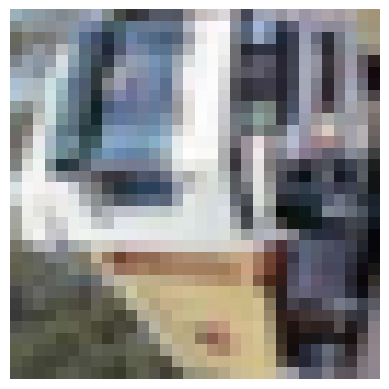

In [76]:
# CHATGPT
from PIL import Image
import matplotlib.pyplot as plt
image = x_train[0]
print(y_train[0])
image_data_reshaped = np.reshape(image, (32, 32, 3), order='F')
image = Image.fromarray(image_data_reshaped.astype('uint8'))
plt.imshow(image)
plt.axis('off')
plt.show()

In [77]:
# TODO :
# Remap labels for merge
# First merge all datasets
# Load images to rgb
# get overview of images: number for each label, look of images

In [78]:
# IDEA:
# for superclass, change all fine_labels corresponding to superclass into one label (for avoiding label duplication, number >= 100)